# Visualizing FordGoBike Data--January 2018
## by Shenghao Wu

## Preliminary Wrangling

##  Introduction
Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201801-fordgobike-tripdata.csv')
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236,Market St at 8th St,37.803686,-122.282497,160,West Oakland BART Station,37.805318,-122.294837,1306,Customer,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134,Valencia St at 24th St,37.752428,-122.420628,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305,Ryland Park,37.342725,-121.895617,317,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 14 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null object
end_time                   94802 non-null object
start_station_id           94802 non-null int64
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null int64
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null int64
user_type                  94802 non-null object
bike_share_for_all_trip    94802 non-null object
dtypes: float64(4), int64(4), object(6)
memory usage: 10.1+ MB


## Define: Converting several of the columns to the appropriate data type:

Starting and ending times to the timestamp format

User type, gender, and bike share for all to category format

Bike ID, start station ID, and end station ID to object format

In [4]:
# Changing the format to datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# Changing the user_type, member_gender, and bike_share_for_all_trip to category format
df.user_type = df.user_type.astype('category')

df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')

# Changing the bike_id, start_station_id, and end_station_id to object
df.bike_id = df.bike_id.astype(str)
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)

In [5]:
# Add columns for day of the week, and hour, along with figuring out the trip duration in minutes so I can create visuals based on workable units
# Start time weekday
df['start_time_weekday'] = df['start_time'].dt.strftime('%a')

# Start and end time hour
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

# Duration in seconds to duration in minutes
df['duration_min'] = df['duration_sec']/60
df['duration_min'] = df['duration_min'].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 18 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null datetime64[ns]
end_time                   94802 non-null datetime64[ns]
start_station_id           94802 non-null object
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null object
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null object
user_type                  94802 non-null category
bike_share_for_all_trip    94802 non-null category
start_time_weekday         94802 non-null object
start_time_hour            94802 non-null int64
end_time_hour              94802 non-null int64
duration_min               94802 non-

### What is the structure of your dataset?

This notebook uses data collected from January 2018

The column header descriptions are as follows (each trip is anonymized):

Trip Duration (seconds)

Start Time and Date

End Time and Date

Start Station ID

Start Station Name

Start Station Latitude

Start Station Longitude

End Station ID

End Station Name

End Station Latitude

End Station Longitude

Bike ID

User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

### After this, I also added some columns

start_time_weekday

start_time_hour

end_time_hour

duration_min

duration_min
### What is/are the main feature(s) of interest in your dataset?

The main features include data related to the start and end of a ride. This can be used to calculate when bikes are in high or low demand.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The start and end times, and related time-based information will be utilized, also the location information can help me analysis which place may acctract more people.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

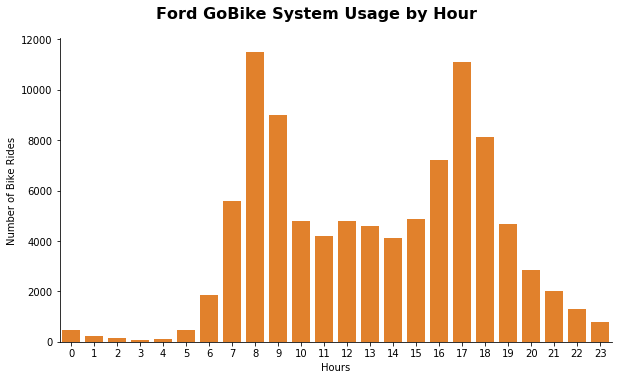

In [7]:
graph = sb.catplot(data = df, x='start_time_hour', kind='count', aspect = 1.7, color=sb.color_palette()[1])

graph.set_axis_labels('Hours', 'Number of Bike Rides')

graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

## Oberservation 1:  The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuters.¶

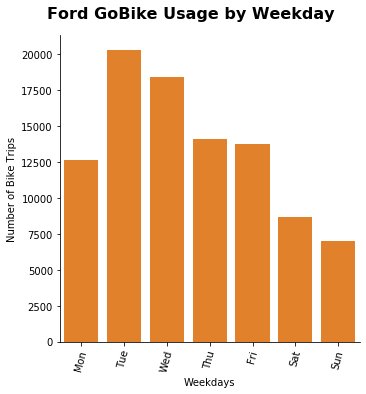

In [8]:
# Weekday usage of the Ford Go bike system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

graph = sb.catplot(data=df, x='start_time_weekday', kind='count', color=sb.color_palette()[1], order = weekday)

graph.set_axis_labels('Weekdays', 'Number of Bike Trips')

graph.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');

graph.set_xticklabels(rotation=75);

## Observation 2: Tuesdays and Wednesdays seem to be the most popular days for using the bike sharing system, however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers. The usage drops significantly on Saturdays and Sundays suggesting the Ford bike share system is used primarily for commuting purposes during working days.¶

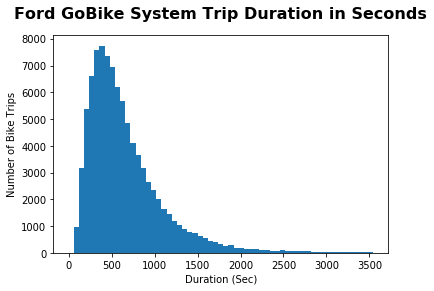

In [9]:
# Duration of the bike rides - in SECONDS
bin_edges = np.arange(0, 3600, 60)

plt.hist(data = df, x = 'duration_sec', bins = bin_edges);

plt.title("Ford GoBike System Trip Duration in Seconds", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Bike Trips');

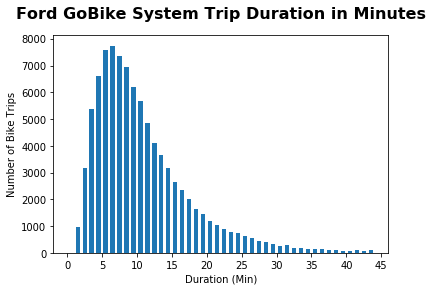

In [10]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

In [11]:
df.duration_min.describe(percentiles = [.95])
df.duration_min.describe()

count    94802.000000
mean        14.023301
std         42.509713
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max       1425.000000
Name: duration_min, dtype: float64

## Observation 3: As we can see 50% people use rent bike do not over 540 seconds, this suggests that usually bike drivers just travel short distance.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

All the distributions can be seen from the graphs. There is no any unsusual points. I did some transformations to calculate out the duration of rent time and use it to analysis the average time 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

No any unusual distributions. I changed data type of day of the week, and hour, along with figuring out the trip duration in minutes so I can create visuals based on workable units.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

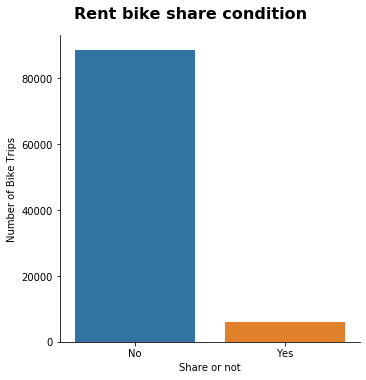

In [12]:
graph = sb.catplot(data=df, x='bike_share_for_all_trip', kind='count')
graph.set_axis_labels('Share or not', 'Number of Bike Trips')
graph.fig.suptitle('Rent bike share condition',y=1.05, fontsize=16, fontweight='bold');

graph.set_xticklabels;

## Observation 4: Most of the people will not choose to share bike for all trips.

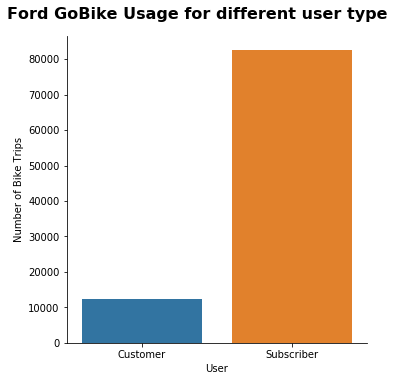

In [13]:
# count user_type of bicycle rent
# Set the conlumn 

graph = sb.catplot(data=df, x='user_type', kind='count')
graph.set_axis_labels('User', 'Number of Bike Trips')
graph.fig.suptitle('Ford GoBike Usage for different user type',y=1.05, fontsize=16, fontweight='bold');

graph.set_xticklabels;

## Oberservation 5: Here we can see the most of users are subscribers, next i am going to inviest the when people will rent more bike.

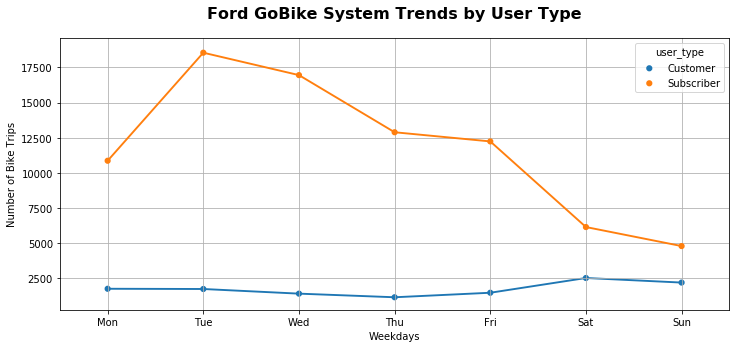

In [14]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_user_week = df.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

## Observation 6: Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend

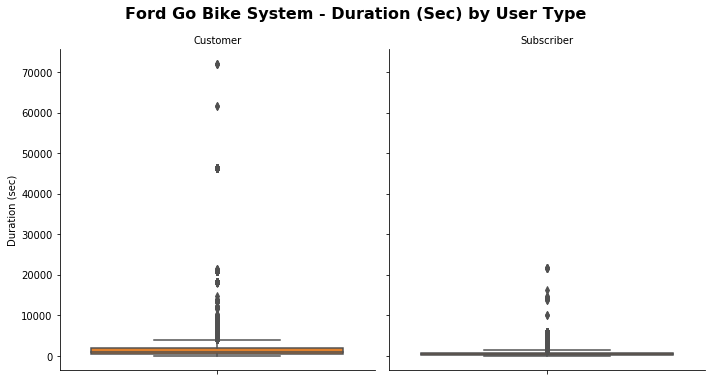

In [15]:
data = df.query('duration_sec')

g = sb.catplot(data=data, y='duration_sec', col="user_type", kind='box', color=sb.color_palette()[1])

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (sec)")
g.fig.suptitle('Ford Go Bike System - Duration (Sec) by User Type', y=1.05, fontsize=16, fontweight='bold');

## Observation 7: Among customers there are more outliers than subscribers. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The data suggests that subscribers will not use bicycle rent often during saturday and sunday. This means that subscribers are usually using bike to go to school or work, also the most large amount of users are subcribers. 



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

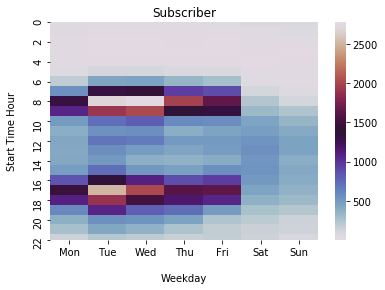

In [16]:
# Heatmap - Subscribers

# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['start_time_weekday'] = pd.Categorical(df['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);
df_subscriber = df.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
hot_map = sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.show()

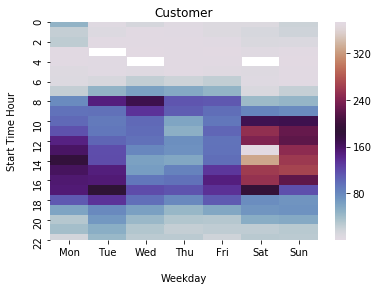

In [17]:
# Heatmap - Customers
#plt.subplot(1, 2, 1)
df_customer = df.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')

heat_map = sb.heatmap(df_customer, cmap = 'twilight')

plt.title('Customer', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

plt.show()

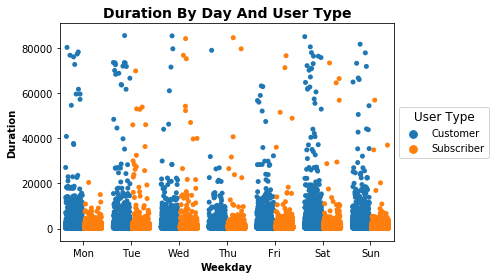

In [22]:
# Strip Plot - day and duration - by User Type
sb.stripplot(data = df, x = "start_time_weekday", y = "duration_sec", hue = "user_type", jitter = 0.35, dodge = True);

plt.title("Duration by Day and User Type". title(), fontsize = 14, weight="bold")
plt.xlabel('Weekday'. title(),
           fontsize = 10, weight = "bold")
plt.ylabel('Duration'. title(),
           fontsize = 10, weight = "bold")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),
          title="User Type", title_fontsize = 12);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Observation 1: Customers use the bike sharing system more often on weekends, whilte Subscribers primarily use the bikes on weekdays.¶

Customers: During weekdays, most bike rides occur between 2-5pm. During weeknds, most bike rides occur between 11am and 3pm, peaking on Saturdays around 3pm.

Subscribers: During weekdays, most bike rides occur around 8-9am and 4-6pm. During weekends, there is a significant drop in the number of rented bikes.

Observation 2: For different user typle, there is not a huge difference about duration towards different weekdays, it seems like more customers will rent the bike over 20000 seconds than subscribers.
### Were there any interesting or surprising interactions between features?

> This is the same as I expected in past, most of the users are subcribers and they use rent bike to go to school or work, while in saturday, the number of subscriber users will decrease and customers will increase because at this time, custoemrs will use rent bike to travel. 

In [18]:
df.to_csv('fordgo_master_clean.csv', index = False)